In [1]:
import pandas as pd
import numpy as np

from datetime import datetime
import pandas as pd 

from scipy import optimize
from scipy import integrate
import warnings

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns


sns.set(style="darkgrid")

mpl.rcParams['figure.figsize'] = (16, 9)
pd.set_option('display.max_rows', 500)

In [2]:
# try to parse the dates right at the beginning 
# it works out of the box if the date was stored ISO YYYY-MM-DD format

df_analyse=pd.read_csv('processed_data.csv',sep=';')  
df_analyse.sort_values('Date',ascending=True).tail()

,Date,Italy,US,Spain,Germany,"Korea,South"
913,2022-07-23,20608190,90398709,13204863,30331133,0.0
914,2022-07-24,20660065,90410386,13204863,30331133,0.0
915,2022-07-25,20684182,90567290,13204863,30476605,0.0
916,2022-07-26,20772833,90733888,13203228,30598385,0.0
917,2022-07-27,20837233,90973418,13203228,30702511,0.0


In [3]:
# set some basic parameters
# beta/gamma is denoted as  'basic reproduction number'

N0=1000000 #max susceptible population
beta=0.6   # infection spread dynamics
gamma=0.2  # recovery rate


# condition I0+S0+R0=N0
I0=df_analyse.Germany[50]
S0=N0-I0
R0=0

In [4]:
def SIR_model(SIR,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return([dS_dt,dI_dt,dR_dt])


In [5]:
SIR=np.array([S0,I0,R0])
propagation_rates=pd.DataFrame(columns={'susceptible':S0,
                                        'infected':I0,
                                        'recoverd':R0})



for each_t in np.arange(100):
   
    new_delta_vec=SIR_model(SIR,beta,gamma)
   
    SIR=SIR+new_delta_vec
    
    propagation_rates=propagation_rates.append({'susceptible':SIR[0],
                                                'infected':SIR[1],
                                                'recovered':SIR[2]}, ignore_index=True)


C:\Users\jaina\AppData\Local\Temp\ipykernel_18600\4143049649.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_18600\4143049649.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_18600\4143049649.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  propagation_rates=propagation_rates.append({'susceptible':SIR[0],
C:\Users\jaina\AppData\Local\Temp\ipykernel_18600\4143049649.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat i

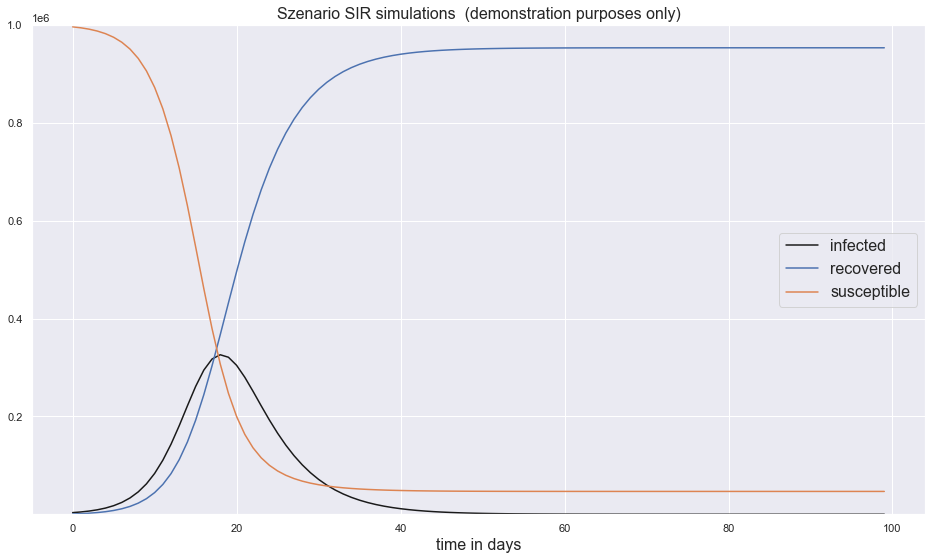

In [6]:
fig, ax1 = plt.subplots(1, 1)

ax1.plot(propagation_rates.index,propagation_rates.infected,label='infected',color='k')
ax1.plot(propagation_rates.index,propagation_rates.recovered,label='recovered')
ax1.plot(propagation_rates.index,propagation_rates.susceptible,label='susceptible')

ax1.set_ylim(10, 1000000)
ax1.set_yscale('linear')
ax1.set_title('Szenario SIR simulations  (demonstration purposes only)',size=16)
ax1.set_xlabel('time in days',size=16)
ax1.legend(loc='best',
           prop={'size': 16});

In [7]:

ydata = np.array(df_analyse.Germany[45:])
t=np.arange(len(ydata))

In [8]:
# ensure re-initialization 
I0=ydata[0]
S0=N0-I0
R0=0
beta

0.6

In [9]:
def SIR_model_t(SIR,t,beta,gamma):
    ''' Simple SIR model
        S: susceptible population
        t: time step, mandatory for integral.odeint
        I: infected people
        R: recovered people
        beta: 
        
        overall condition is that the sum of changes (differnces) sum up to 0
        dS+dI+dR=0
        S+I+R= N (constant size of population)
    
    '''
    
    S,I,R=SIR
    dS_dt=-beta*S*I/N0          #S*I is the 
    dI_dt=beta*S*I/N0-gamma*I
    dR_dt=gamma*I
    return dS_dt,dI_dt,dR_dt

In [10]:
def fit_odeint(x, beta, gamma):
    '''
    helper function for the integration
    '''
    return integrate.odeint(SIR_model_t, (S0, I0, R0), t, args=(beta, gamma))[:,1] # we only would like to get dI

In [11]:
# example curve of our differential equationa
popt=[0.4,0.1]
fit_odeint(t, *popt)

array([ 6.84000000e+02,  9.22994933e+02,  1.24531145e+03,  1.67984649e+03,
        2.26539455e+03,  3.05393632e+03,  4.11493673e+03,  5.54089421e+03,
        7.45438063e+03,  1.00167476e+04,  1.34384856e+04,  1.79908073e+04,
        2.40172342e+04,  3.19426022e+04,  4.22747753e+04,  5.55914806e+04,
        7.25015903e+04,  9.35685704e+04,  1.19187062e+05,  1.49416218e+05,
        1.83798305e+05,  2.21222750e+05,  2.59915255e+05,  2.97611724e+05,
        3.31906846e+05,  3.60678193e+05,  3.82439796e+05,  3.96512909e+05,
        4.02991278e+05,  4.02560499e+05,  3.96262556e+05,  3.85279775e+05,
        3.70775838e+05,  3.53799801e+05,  3.35241677e+05,  3.15823029e+05,
        2.96107789e+05,  2.76522601e+05,  2.57379976e+05,  2.38900575e+05,
        2.21232909e+05,  2.04469890e+05,  1.88662305e+05,  1.73829539e+05,
        1.59967978e+05,  1.47057517e+05,  1.35066551e+05,  1.23955770e+05,
        1.13681032e+05,  1.04195495e+05,  9.54512176e+04,  8.74003080e+04,
        7.99957641e+04,  

In [12]:
# the resulting curve has to be fitted
# free parameters are here beta and gamma

In [13]:
popt, pcov = optimize.curve_fit(fit_odeint, t, ydata)
perr = np.sqrt(np.diag(pcov))
    
print('standard deviation errors : ',str(perr), ' start infect:',ydata[0])
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])


standard deviation errors :  [9.4750424e-04 4.1036895e-05]  start infect: 684
Optimal parameters: beta = 0.041201031336500264  and gamma =  -0.004824034497107367


C:\Users\jaina\AppData\Local\Temp\ipykernel_18600\649699423.py:16: RuntimeWarning: overflow encountered in double_scalars
  dS_dt=-beta*S*I/N0          #S*I is the
C:\Users\jaina\AppData\Local\Temp\ipykernel_18600\649699423.py:17: RuntimeWarning: overflow encountered in double_scalars
  dI_dt=beta*S*I/N0-gamma*I
C:\Users\jaina\AppData\Local\Temp\ipykernel_18600\649699423.py:18: RuntimeWarning: overflow encountered in double_scalars
  dR_dt=gamma*I
C:\Users\jaina\anaconda3\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Illegal input detected (internal error). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


In [14]:
# get the final fitted curve
fitted=fit_odeint(t, *popt)

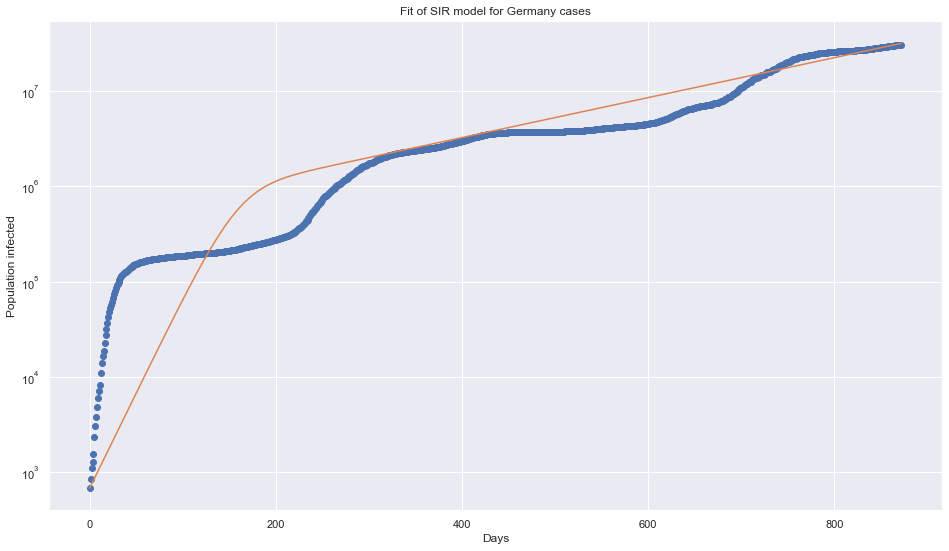

Optimal parameters: beta = 0.041201031336500264  and gamma =  -0.004824034497107367
Basic Reproduction Number R0  -8.540782898879685
This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki


In [15]:
plt.semilogy(t, ydata, 'o')
plt.semilogy(t, fitted)
plt.title("Fit of SIR model for Germany cases")
plt.ylabel("Population infected")
plt.xlabel("Days")
plt.show()
print("Optimal parameters: beta =", popt[0], " and gamma = ", popt[1])
print("Basic Reproduction Number R0 " , popt[0]/ popt[1])
print("This ratio is derived as the expected number of new infections (these new infections are sometimes called secondary infections from a single infection in a population where all subjects are susceptible. @wiki")